<hr>
<font size=5 color='#217638'> <b> Red Wine Quality Classification Analysis - Tolgahan Çepel </b> </font> 
<hr/>
<font color=green>
    
1. [Overview](#1)
1. [Importing Libraries and Reading the Dataset](#2)
1. [Data Visualization and Preprocessing](#3)
1. [Classification Models](#4) 
    * [Logistic Regression](#5) 
    * [K-Nearest Neighbors(K-NN)](#6)
    * [Support Vector Machine (SVM - Linear)](#7)
    * [Support Vector Machine (SVM - Kernel)](#8)
    * [Naive Bayes](#9)
    * [Decision Tree Classification](#10) 
    * [Random Forest Classification](#11)
1. [Measuring the Error](#12)
    * [Visualizing Models Performance](#13)
1. [Conclusion](#14)
</font>

## <span id="1"></span> 1. Overview

Input Variables:
- <b>fixed acidity: </b> most acids involved with wine or fixed or nonvolatile
- <b>volatile acidity: </b> the amount of acetic acid in wine
- <b>citric acid: </b> found in small quantities, citric acid can add 'freshness' and flavor to wines 
- <b>residual sugar: </b> the amount of sugar remaining after fermentation stops
- <b>chlorides: </b> the amount of salt in the wine
- <b>free sulfur dioxide: </b> the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
- <b>vtotal sulfur dioxide: </b> amount of free and bound forms of S02
- <b>density: </b> the density of water is close to that of water depending on the percent alcohol and sugar content
- <b>pH: </b> describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- <b>sulphates: </b> a wine additive which can contribute to sulfur dioxide gas (S02) levels 
- <b>alcohol: </b> the percent alcohol content of the wine<br>

Output Variable:
- <b>quality: </b> output variable (based on sensory data, score between 0 and 10)

## <span id="2"></span> 2. Importing Libraries and Reading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [2]:
dataset = pd.read_csv('./dataset/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## <span id="3"></span> 3. Data Visualization and Preprocessing

In [3]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
dataset['quality'] = pd.cut(x = dataset['quality'], bins = bins, labels = labels)

In [5]:
dataset['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dataset['quality'] = labelencoder_y.fit_transform(dataset['quality'])

C:\Users\CEPEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\CEPEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\CEPEL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\CEPEL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


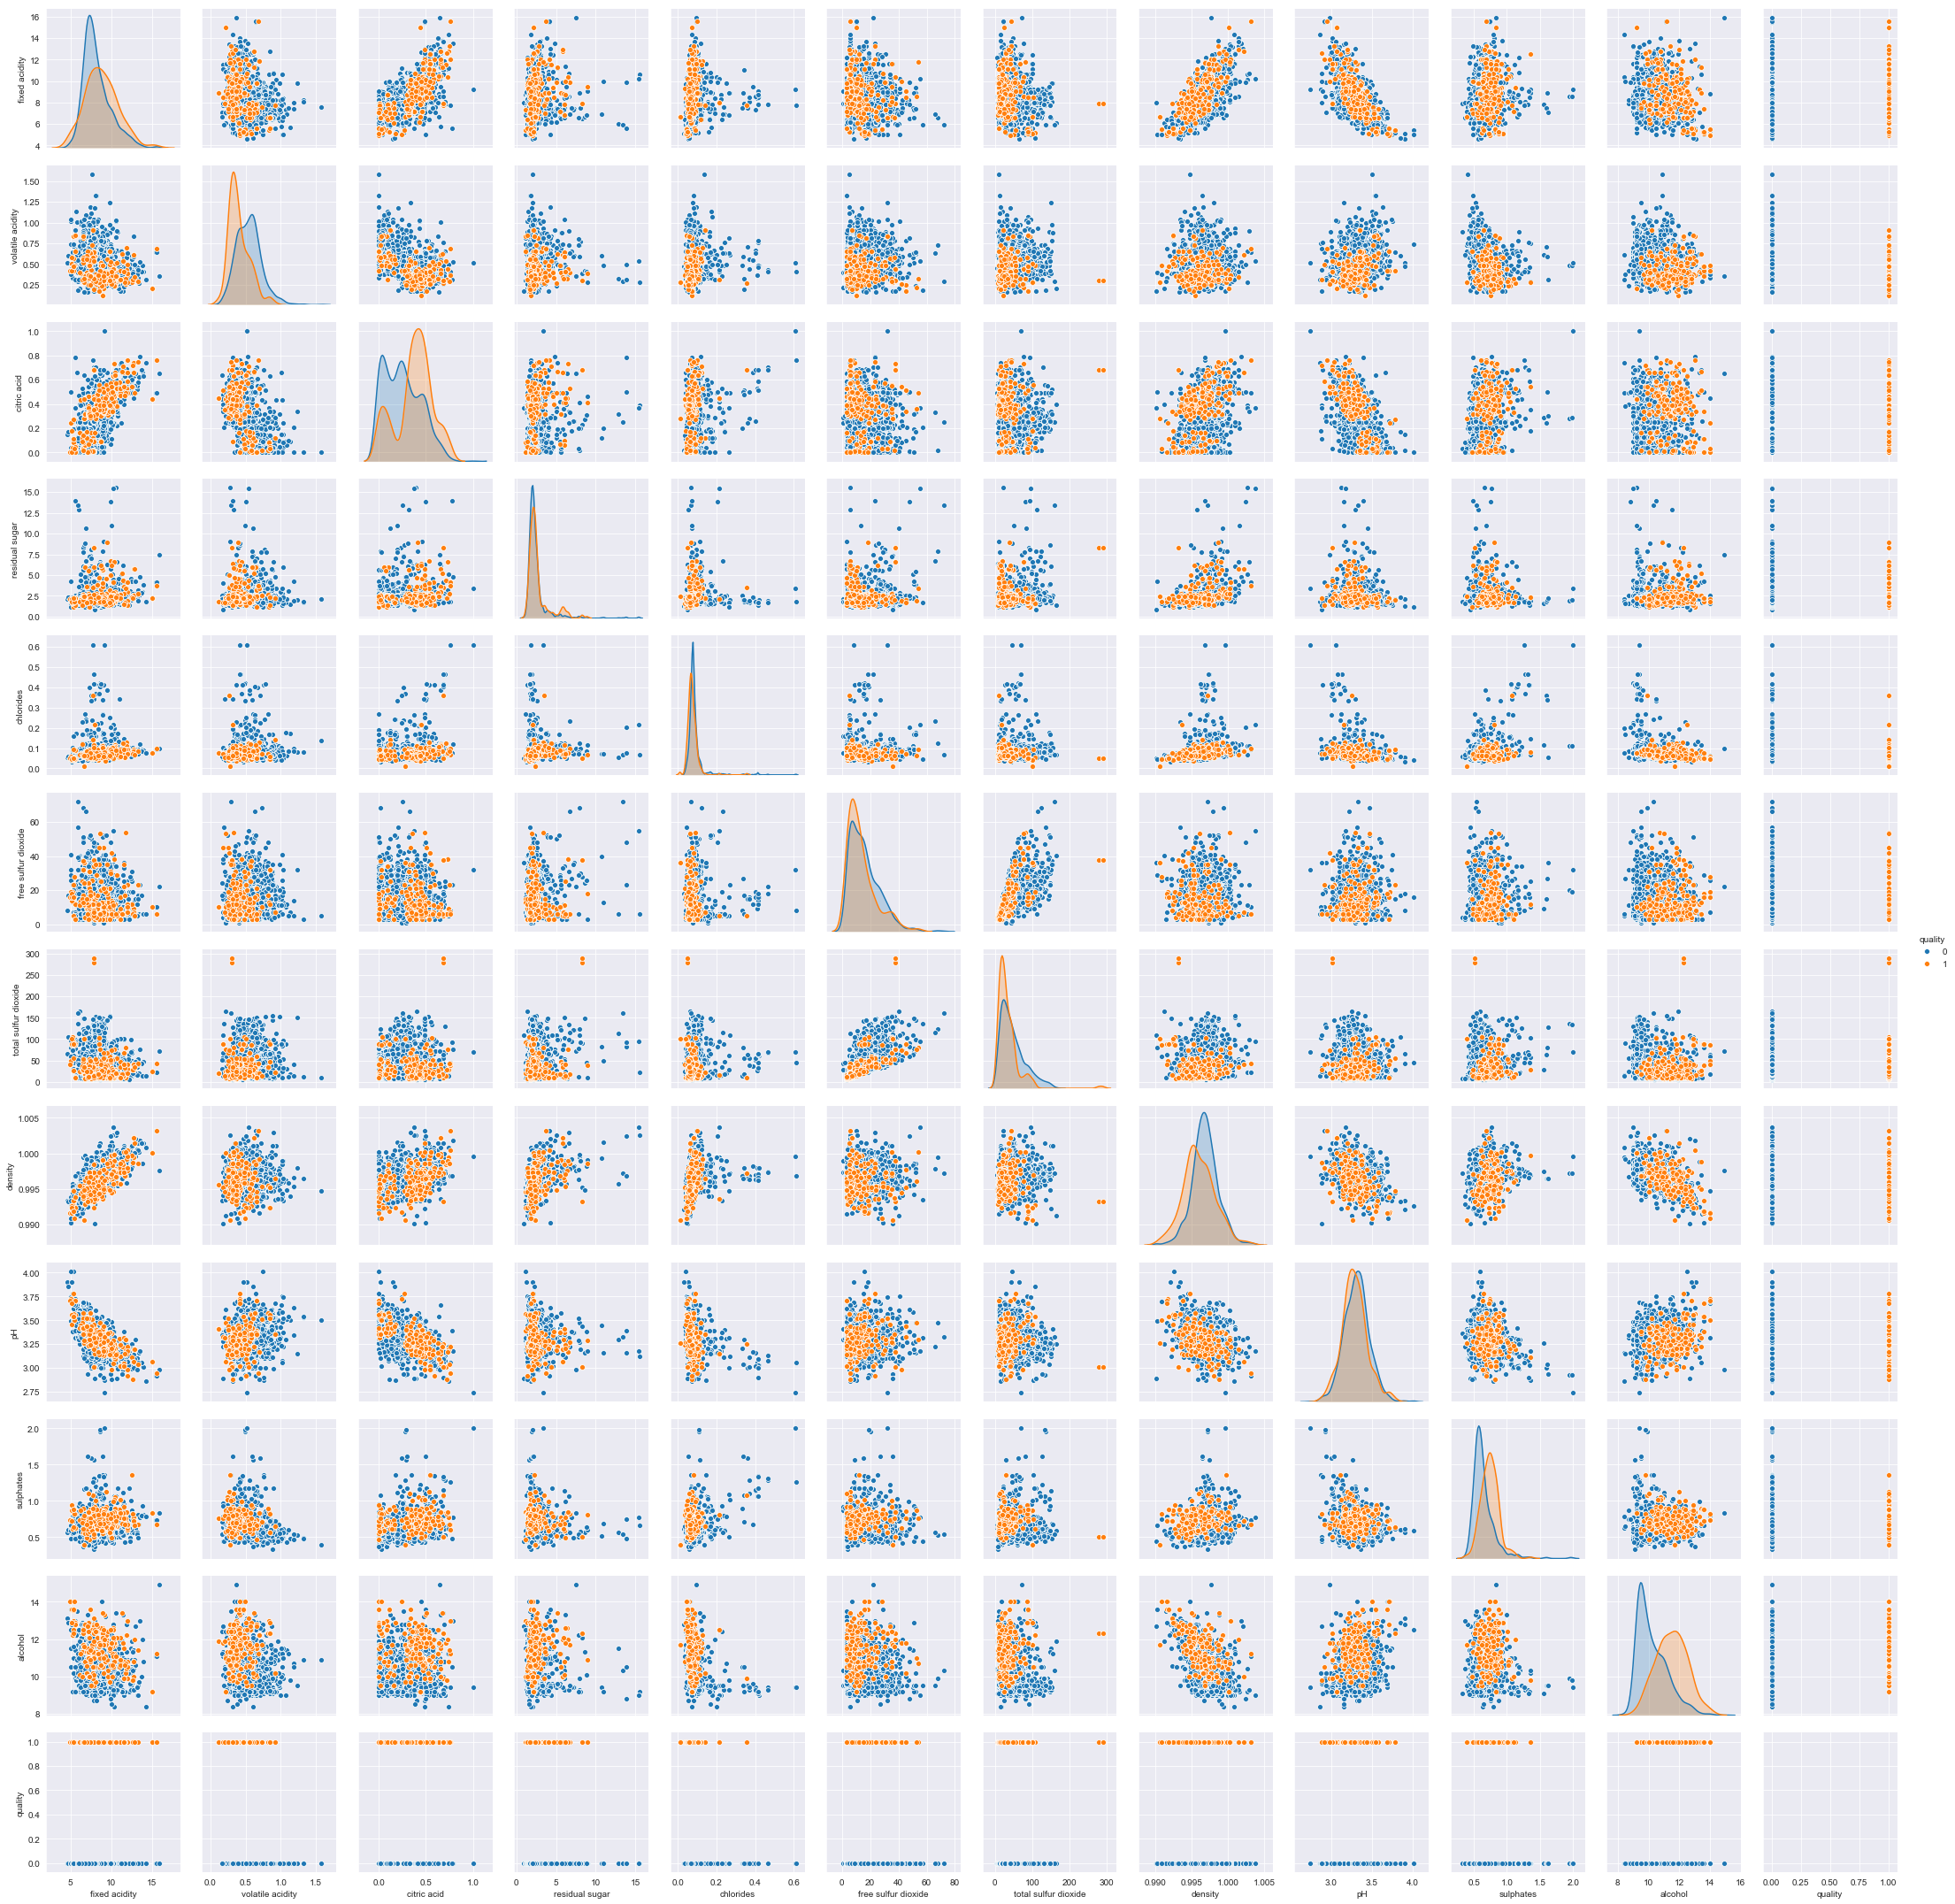

In [7]:
sns.pairplot(dataset, hue = 'quality')

In [8]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
X = dataset.drop('quality', axis = 1).values
y = dataset['quality'].values.reshape(-1,1)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279, 1)
Shape of y_test (320, 1)


## <span id="4"></span> 4. Classification Models

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### <span id="5"></span> Logistic Regression

In [13]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train_scaled, y_train.ravel())

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred_lr_train = classifier_lr.predict(X_train_scaled)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

Training set:  0.8858483189992181
Test set:  0.865625


In [15]:
confusion_matrix(y_test, y_pred_lr_test)

array([[264,   9],
       [ 34,  13]], dtype=int64)

In [16]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]

### <span id="6"></span> K-Nearest Neighbors (K-NN)

In [17]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=32, p=2,
           weights='distance')

In [18]:
y_pred_knn_train = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

Training set:  1.0
Test set:  0.89375


In [19]:
confusion_matrix(y_test, y_pred_knn_test)

array([[264,   9],
       [ 25,  22]], dtype=int64)

In [20]:
tp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,0]
fp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,1]
tn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,1]
fn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,0]

### <span id="7"></span> Support Vector Machine (SVM - Linear)

In [21]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(X_train_scaled, y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred_svm_linear_train = classifier_svm_linear.predict(X_train_scaled)
accuracy_svm_linear_train = accuracy_score(y_train, y_pred_svm_linear_train)
print("Training set: ", accuracy_svm_linear_train)

y_pred_svm_linear_test = classifier_svm_linear.predict(X_test_scaled)
accuracy_svm_linear_test = accuracy_score(y_test, y_pred_svm_linear_test)
print("Test set: ", accuracy_svm_linear_test)

Training set:  0.8670836591086787
Test set:  0.853125


In [23]:
confusion_matrix(y_test, y_pred_svm_linear_test)

array([[273,   0],
       [ 47,   0]], dtype=int64)

In [24]:
tp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,0]
fp_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[0,1]
tn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,1]
fn_svm_linear = confusion_matrix(y_test, y_pred_svm_linear_test)[1,0]

### <span id="8"></span> Support Vector Machine (SVM - Kernel)

In [25]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier_svm_kernel = SVC(kernel = 'rbf', C = 10, tol = 0.001)
classifier_svm_kernel.fit(X_train_scaled, y_train.ravel())

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [26]:
y_pred_svm_kernel_train = classifier_svm_kernel.predict(X_train_scaled)
accuracy_svm_kernel_train = accuracy_score(y_train, y_pred_svm_kernel_train)
print("Training set: ", accuracy_svm_kernel_train)

y_pred_svm_kernel_test = classifier_svm_kernel.predict(X_test_scaled)
accuracy_svm_kernel_test = accuracy_score(y_test, y_pred_svm_kernel_test)
print("Test set: ", accuracy_svm_kernel_test)

Training set:  0.9421422986708365
Test set:  0.89375


In [27]:
confusion_matrix(y_test, y_pred_svm_kernel_test)

array([[261,  12],
       [ 22,  25]], dtype=int64)

In [28]:
tp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,0]
fp_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[0,1]
tn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,1]
fn_svm_kernel = confusion_matrix(y_test, y_pred_svm_kernel_test)[1,0]

### <span id="9"></span> Naive Bayes

In [29]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_scaled, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
y_pred_nb_train = classifier_nb.predict(X_train_scaled)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test_scaled)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.8389366692728695
Test set:  0.846875


In [31]:
confusion_matrix(y_test, y_pred_nb_test)

array([[234,  39],
       [ 10,  37]], dtype=int64)

In [32]:
tp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,0]
fp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,1]
tn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,1]
fn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,0]

### <span id="10"></span> Decision Tree Classification

In [33]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train_scaled, y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=6, max_leaf_nodes=400, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=33, splitter='best')

In [34]:
y_pred_dt_train = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  1.0
Test set:  0.878125


In [35]:
confusion_matrix(y_test, y_pred_dt_test)

array([[252,  21],
       [ 18,  29]], dtype=int64)

In [36]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]
tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]

### <span id="11"></span> Random Forest Classification

In [37]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
classifier_rf.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

In [38]:
y_pred_rf_train = classifier_rf.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.9125


In [39]:
confusion_matrix(y_test, y_pred_rf_test)

array([[267,   6],
       [ 22,  25]], dtype=int64)

In [40]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]

## <span id="12"></span> 5. Measuring the Error

In [41]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test),
          ('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, accuracy_knn_train, accuracy_knn_test),
          ('SVM (Linear)', tp_svm_linear, fp_svm_linear, tn_svm_linear, fn_svm_linear, accuracy_svm_linear_train, accuracy_svm_linear_test),
          ('SVM (Kernel)', tp_svm_kernel, fp_svm_kernel, tn_svm_kernel, fn_svm_kernel, accuracy_svm_kernel_train, accuracy_svm_kernel_test),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_nb_train, accuracy_nb_test),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test),
          ('Random Forest Tree Classification', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test)
         ]

In [42]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative', 'False Negative', 'Accuracy(training)', 'Accuracy(test)'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test)
0,Logistic Regression,264,9,13,34,0.885848,0.865625
1,K-Nearest Neighbors (KNN),264,9,22,25,1.000000,0.893750
2,SVM (Linear),273,0,0,47,0.867084,0.853125
3,SVM (Kernel),261,12,25,22,0.942142,0.893750
4,Naive Bayes,234,39,37,10,0.838937,0.846875
5,Decision Tree Classification,252,21,29,18,1.000000,0.878125
6,Random Forest Tree Classification,267,6,25,22,1.000000,0.912500


### <span id="13"></span> Visualizing Model Performance

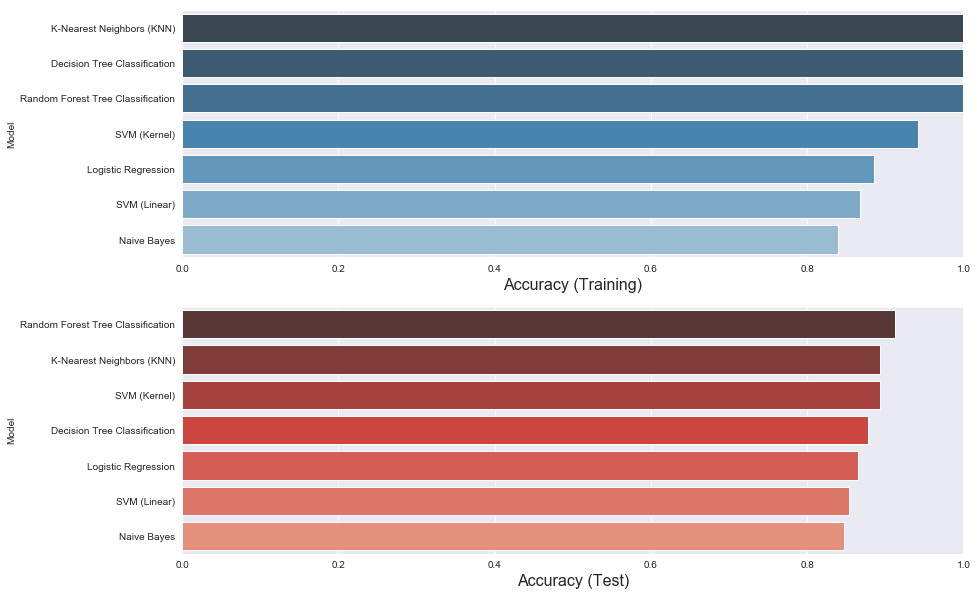

In [43]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

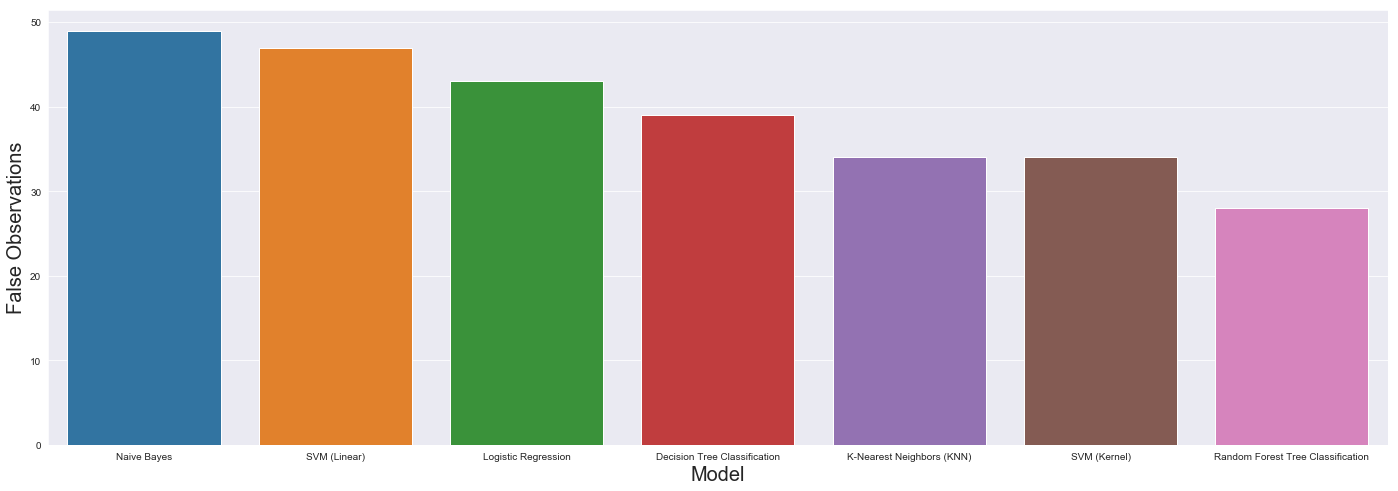

In [44]:
predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

## <span id="14"></span> 5. Conclusion

In this analysis, I have built 7 classification models using Red Wine Quality Dataset. These are logistic, k-nn, svm(linear), svm(kernel), naive bayes, decision tree and random forest classification. Then measured and visualized the performance of the models. Please let me know how to improve model performance, visualization or something in this notebook. This will also help me on my future analysis.